Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Dimenssion of the dataset is (768, 9)
Outcome
0    500
1    268
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Accuracy of Train dataset for KNN: 0.79
Accuracy of test dataset for KNN: 0.78



Training set accuracy for Logistic Regression: 0.781
Test set accuracy for Logistic Regression: 

C:\Users\SUMON\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Training set for Random Forest: 1.000
Accuracy of Test set for Random Forest: 0.786




C:\Users\SUMON\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\SUMON\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\SUMON\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SUMON\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SUMON\Anaconda3\lib\site-packag

Accuracy of Training set for SVM : 0.790
Accuracy of Test set for SVM : 0.797
Accuracy on training set for Deep learning: 0.908
Accuracy on test set  for Deep learning :0.792


C:\Users\SUMON\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


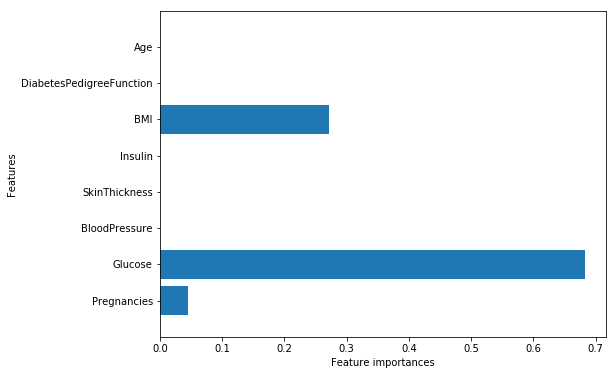

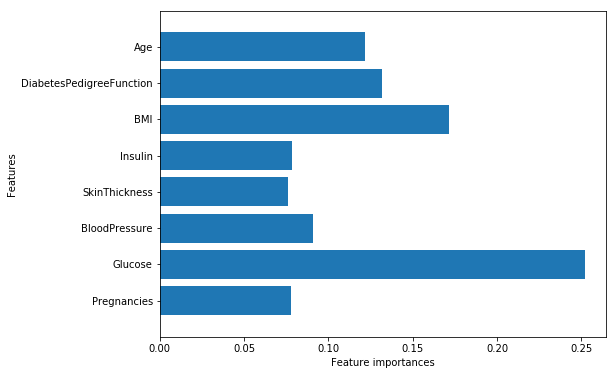

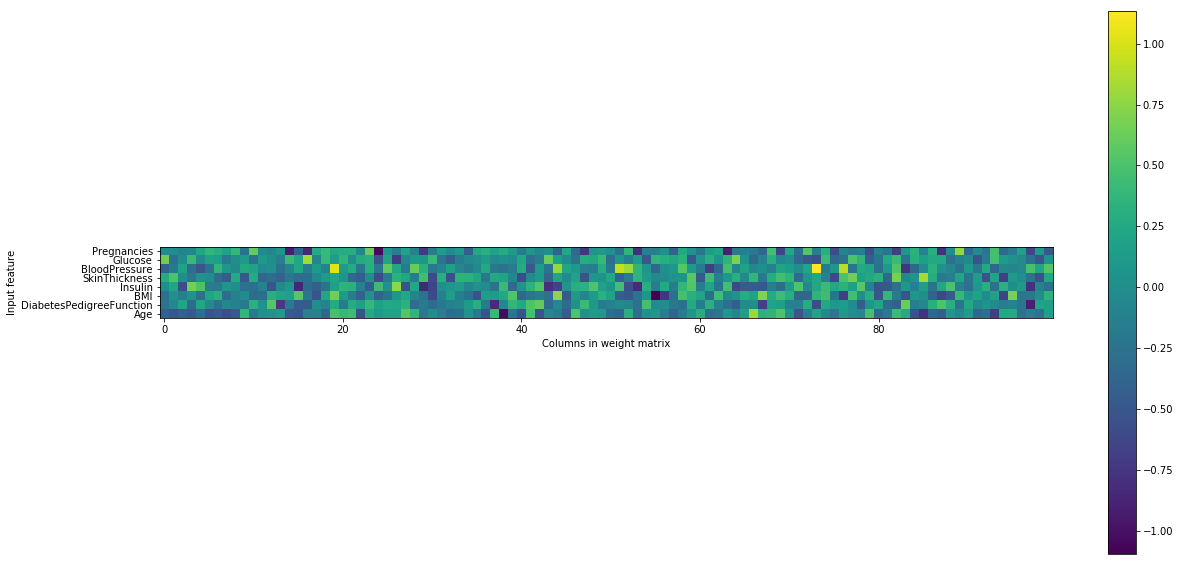

In [32]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

diabetes = pd.read_csv("F:\\DataSet\diabetes.csv")

# printing the columns of the dataset
print(diabetes.columns)

#dimenssion of the dataset
print("Dimenssion of the dataset is",diabetes.shape)

#outcomes 

print(diabetes.groupby('Outcome').size())
print('\n')

#plotting outcome
#sn.countplot(diabetes['Outcome'],label="Count")

diabetes.info()

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(diabetes.loc[:,diabetes.columns!='Outcome'],diabetes['Outcome'],stratify=diabetes['Outcome'],random_state=66)

from sklearn.neighbors import KNeighborsClassifier
train_accuracy = []
test_accuracy = []
#neighbors_setting = range(1,11)

#for n_neighbors in neighbors_setting:
    #build model
  #  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
   # knn.fit(x_train,y_train)
    
    #train accuracy calculate
   # train_accuracy.append(knn.score(x_train,y_train))
    
    #test accuracy calculate
   # test_accuracy.append(knn.score(x_test,y_test))
    

#plt.plot(neighbors_setting,train_accuracy,label="Train Accuracy")
#plt.plot(neighbors_setting,test_accuracy,label="Test Accuracy")
#plt.xlabel("n_neighbors")
#plt.ylabel("accuracy")
#plt.legend()
#plt.savefig("knn_compare_model")

#KNN classifier with neighbors_setting=9

knn = KNeighborsClassifier(n_neighbors=9)
knn = knn.fit(x_train,y_train)

#prediction = knn.predict([[10,167,74,0,0,38,0.134,33]])
#print(prediction)

print("Accuracy of Train dataset for KNN: {:.2f}".format(knn.score(x_train,y_train)))

print("Accuracy of test dataset for KNN: {:.2f}".format(knn.score(x_test,y_test)))

print("\n\n")

#Logistic Regression

from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg = logReg.fit(x_train,y_train)


print("Training set accuracy for Logistic Regression: {:.3f}".format(logReg.score(x_train,y_train)))

print("Test set accuracy for Logistic Regression: {:.3f}".format(logReg.score(x_test,y_test)))
    
print("\n")
#Decision Tree 

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train,y_train)
print("Accuracy of training set for Decision Tree: {:.2f}".format(tree.score(x_train,y_train)))
print("Accuracy of test set for Decision Tree: {:.2f}".format(tree.score(x_test,y_test)))

print("Feauture importance: ",tree.feature_importances_)
diabetes_features = [x for i,x in
enumerate(diabetes.columns) if i!=8]

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),diabetes_features)
    plt.xlabel("Feature importances")
    plt.ylabel("Features")
    plt.ylim(-1,n_features)
    

plot_feature_importances_diabetes(tree)
plt.savefig('Feature Importance')

#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=0)

rf = rf.fit(x_train,y_train)

print("Accuracy of Training set for Random Forest: {:.3f}".format(rf.score(x_train,y_train)))
print("Accuracy of Test set for Random Forest: {:.3f}".format(rf.score(x_test,y_test)))
print('\n')

plot_feature_importances_diabetes(rf)
plt.savefig("Feature Importances for random forest")


# SVM 

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

svc = SVC(C=1000)
svc.fit(x_train_scaled,y_train)

print("Accuracy of Training set for SVM : {:.3f}".format(svc.score(x_train_scaled,y_train)))
print("Accuracy of Test set for SVM : {:.3f}".format(svc.score(x_test_scaled,y_test)))


#Deep Learning

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(x_train_scaled, y_train)
print("Accuracy on training set for Deep learning: {:.3f}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy on test set  for Deep learning :{:.3f}".format(mlp.score(x_test_scaled, y_test)))

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none',
cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
    
    